In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
import pandas as pd
import matplotlib as plt
import matplotlib.pyplot as pyplt
import descartes
import geopandas as gpd
import numpy as np
import datetime

from shapely.geometry import Point, Polygon
%matplotlib inline

# CS 418 Semester Project, Analysis of Fire Start Data across United States

### Group Members:
* Trevor Parchem (tparch3)
* Sai Nadkarni (snadka2)

## Loading the Data

In [3]:
# Load the data from the CSV file containing the merged records from United States & Canada Fire Agencies
data = pd.read_csv("uscan_1986-2013.csv")

data.head(10)

,datasource,sourceid,latitude,longitude,year,mon,day,daynum,area_ha,cause_original,cause1,cause2,stateprov,agency
0,fpafod,1,40.036944,-121.005833,2005,2,2,33,0.040469,9,2,8,CA,FS
1,fpafod,2,38.933056,-120.404444,2004,5,12,133,0.101171,1,1,1,CA,FS
2,fpafod,3,38.984167,-120.735556,2004,5,31,152,0.040469,5,2,5,CA,FS
3,fpafod,4,38.559167,-119.913333,2004,6,28,180,0.040469,1,1,1,CA,FS
4,fpafod,5,38.559167,-119.933056,2004,6,28,180,0.040469,1,1,1,CA,FS
5,fpafod,6,38.635278,-120.103611,2004,6,30,182,0.040469,1,1,1,CA,FS
6,fpafod,7,38.688333,-120.153333,2004,7,1,183,0.040469,1,1,1,CA,FS
7,fpafod,8,40.968056,-122.433889,2005,3,8,67,0.323749,5,2,5,CA,FS
8,fpafod,9,41.233611,-122.283333,2005,3,15,74,0.404686,5,2,5,CA,FS
9,fpafod,10,38.548333,-120.149167,2004,7,1,183,0.040469,1,1,1,CA,FS


In [4]:
#Remove unneeded columns
data = data.drop(columns=['sourceid', 'agency', 'datasource'])

In [5]:
#Filter to only US locations
stateList = ['CA', 'NM', 'OR', 'NC', 'WY', 'CO', 'WA', 'MT', 'UT', 'AZ', 'SD',
       'AR', 'NV', 'ID', 'MN', 'TX', 'FL', 'SC', 'LA', 'OK', 'KS', 'MO',
       'NE', 'MI', 'KY', 'OH', 'IN', 'VA', 'IL', 'TN', 'GA', 'AK', 'ND',
       'WV', 'WI', 'AL', 'NH', 'PA', 'MS', 'ME', 'VT', 'NY', 'IA', 'DC',
       'MD', 'CT', 'MA', 'NJ', 'HI', 'DE', 'PR', 'RI']

usData = data[data['stateprov'].isin(stateList)]
print(usData['year'].describe())

count    1.849052e+06
mean     2.001856e+03
std      6.922694e+00
min      1.986000e+03
25%      1.996000e+03
50%      2.002000e+03
75%      2.008000e+03
max      2.013000e+03
Name: year, dtype: float64


In [6]:
usData.head(10)

,latitude,longitude,year,mon,day,daynum,area_ha,cause_original,cause1,cause2,stateprov
0,40.036944,-121.005833,2005,2,2,33,0.040469,9,2,8,CA
1,38.933056,-120.404444,2004,5,12,133,0.101171,1,1,1,CA
2,38.984167,-120.735556,2004,5,31,152,0.040469,5,2,5,CA
3,38.559167,-119.913333,2004,6,28,180,0.040469,1,1,1,CA
4,38.559167,-119.933056,2004,6,28,180,0.040469,1,1,1,CA
5,38.635278,-120.103611,2004,6,30,182,0.040469,1,1,1,CA
6,38.688333,-120.153333,2004,7,1,183,0.040469,1,1,1,CA
7,40.968056,-122.433889,2005,3,8,67,0.323749,5,2,5,CA
8,41.233611,-122.283333,2005,3,15,74,0.404686,5,2,5,CA
9,38.548333,-120.149167,2004,7,1,183,0.040469,1,1,1,CA


In [7]:
#Create points from lat and long
geometry = [Point(xy) for xy in zip( usData['longitude'], usData['latitude'])]
geometry[:3]

In [8]:
#Specify Co-ordinate reference system, Create geodataframe
crs = { 'init': 'epsg:4326' }
geoUSData = gpd.GeoDataFrame(usData, crs = crs, geometry = geometry)
geoUSData.head()

c:\users\tcpar\appdata\local\programs\python\python38\lib\site-packages\pyproj\crs\crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


,latitude,longitude,year,mon,day,daynum,area_ha,cause_original,cause1,cause2,stateprov,geometry
0,40.036944,-121.005833,2005,2,2,33,0.040469,9,2,8,CA,POINT (-121.00583 40.03694)
1,38.933056,-120.404444,2004,5,12,133,0.101171,1,1,1,CA,POINT (-120.40444 38.93306)
2,38.984167,-120.735556,2004,5,31,152,0.040469,5,2,5,CA,POINT (-120.73556 38.98417)
3,38.559167,-119.913333,2004,6,28,180,0.040469,1,1,1,CA,POINT (-119.91333 38.55917)
4,38.559167,-119.933056,2004,6,28,180,0.040469,1,1,1,CA,POINT (-119.93306 38.55917)


<AxesSubplot:>

(-182.0, -50.0)

(18.0, 82.0)

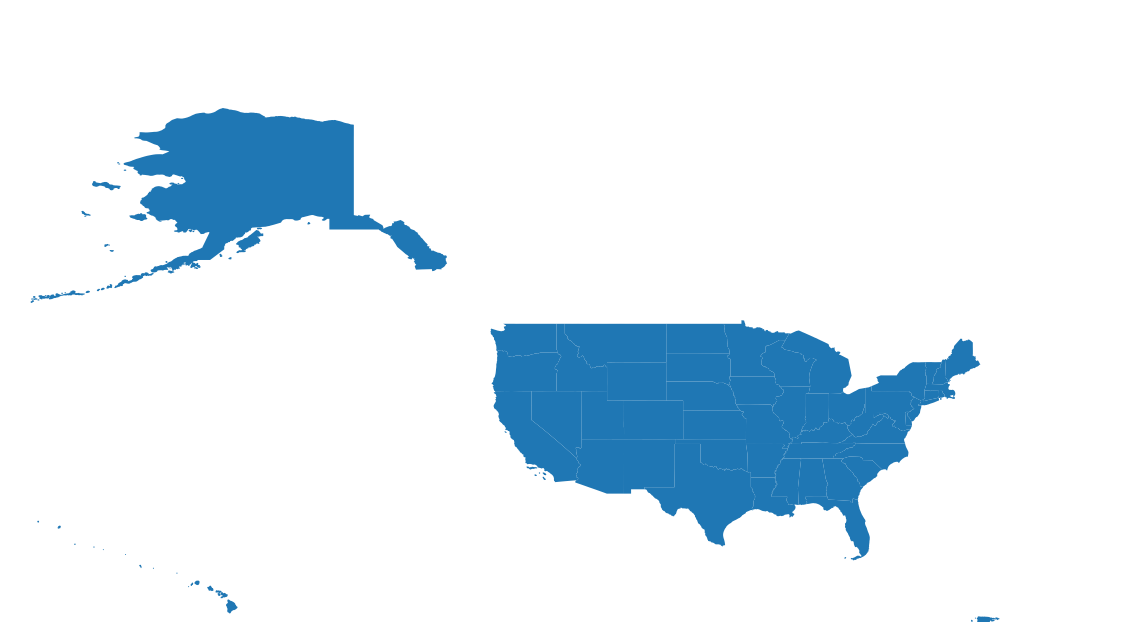

In [9]:
usMap = gpd.read_file("tl_2017_us_state.shp")
fig, ax = pyplt.subplots(figsize = (20, 20))
usMap.plot(ax = ax)
xlim = ([-182, -50])
ylim = ([18, 82])
ax.set_xlim(xlim)
ax.set_ylim(ylim)
ax.set_axis_off()

In [ ]:
fig, ax = pyplt.subplots(figsize = (20, 20))
usMap.plot(ax = ax)
xlim = ([-182, -50])
ylim = ([18, 82])
ax.set_xlim(xlim)
ax.set_ylim(ylim)
ax.set_axis_off()

geoUSData.plot(ax = ax, markersize = 1, color = "red", marker = "o")

<AxesSubplot:>

(-182.0, -50.0)

(18.0, 82.0)

In [ ]:
# Filter data down to only CA wildfires
caData = data[data['stateprov'].isin(['CA'])]
print(caData['year'].describe())

In [ ]:
#Create points from lat and long
geometry = [Point(xy) for xy in zip( caData['longitude'], caData['latitude'])]
geometry[:3]

In [ ]:
#Specify Co-ordinate reference system, Create geodataframe
crs = { 'init': 'epsg:4326' }
geoCAData = gpd.GeoDataFrame(caData, crs = crs, geometry = geometry)
geoCAData.head()

In [ ]:
caMap = usMap[usMap['NAME'] == 'California'].plot(figsize=(12,12))
xlim = ([-182, -50])
ylim = ([18, 82])
ax.set_xlim(xlim)
ax.set_ylim(ylim)
ax.set_axis_off()

In [ ]:
fig, ax = pyplt.subplots(figsize = (12, 12))
caMap.plot(ax = ax)

geoCAData.plot(ax = ax, markersize = 1, color = "red", marker = "o")